In [118]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
# plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv('/Users/tiff/Data_Portfolio/Data-Analytics-Portfolio-Projects/movies.csv')

In [119]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [120]:
# checks for missing data in each column of a pandas DataFrame 
# and prints the percentage of missing values for each column


# For every column in df, it calculates the proportion of missing (null/NaN) entries.
# df[col].isnull() gives a boolean Series where True indicates a missing value.
# np.mean(...) converts True to 1 and False to 0, so the mean yields the fraction of missing entries.
# Multiplying by 100 gives the percentage of missing data for each column.
# The result is printed for each column, indicating, for example, that "col1 - 2.5%" means 2.5% of entries in col1 are null.


for col in df.columns:                              
    pct_missing = np.mean(df[col].isnull())         
                                                    
    print('{} - {}%'.format(col, pct_missing*100))  

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [121]:
# The missing data percentages for the columns show that indeed 
# budget (28.31%), gross (2.46%), and rating (1.00%) have notable missing values in the dataset, 
# while other columns have very low or zero missing rates. 
# This indicates these three columns require special
# attention for handling missing data in any data processing or analysis workflow

# Possible approaches for these columns include:
# 1. Imputation based on domain knowledge or other features
# 2. Dropping rows with missing values if the dataset is large enough
# 3. Flagging missing entries explicitly as a separate category if appropriate

In [122]:
# To check the data types of each column in a pandas DataFrame
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [123]:
# Change the data type of columns budget and gross to integer
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

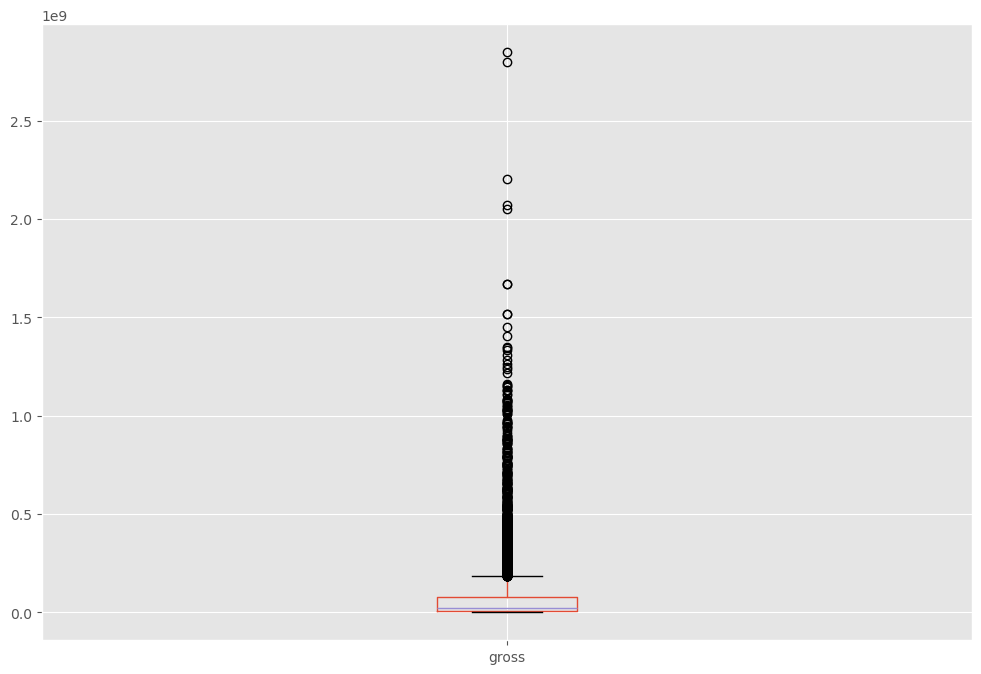

In [124]:
# Are there any Outliers?
# Creating a boxplot for the "gross" column
df.boxplot(column=['gross'])
plt.show()

In [125]:
#Drop any duplicates
#drop_duplicates() removes duplicate values within the 'company' column only, returning a Series of unique company names.
#Use pandas methods like .duplicated() to find and count duplicates in your dataset.

#df['company'].drop_duplicates().sort_values(ascending=False)

In [126]:
#Create correct year column
#df['yearCorrect'] = df['released'].str.extract(r',\s*(\d{4})')

In [127]:
# display all company 
df['company'].sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
447                                      Zoetrope Studios
302                                      Zoetrope Studios
724                                      Zoetrope Studios
520                                      Zoetrope Studios
352                                      Zoetrope Studios
332                                      Zoetrope Studios
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222          

In [128]:
# Order our Data a little bit to see which company has the most gross

df= df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


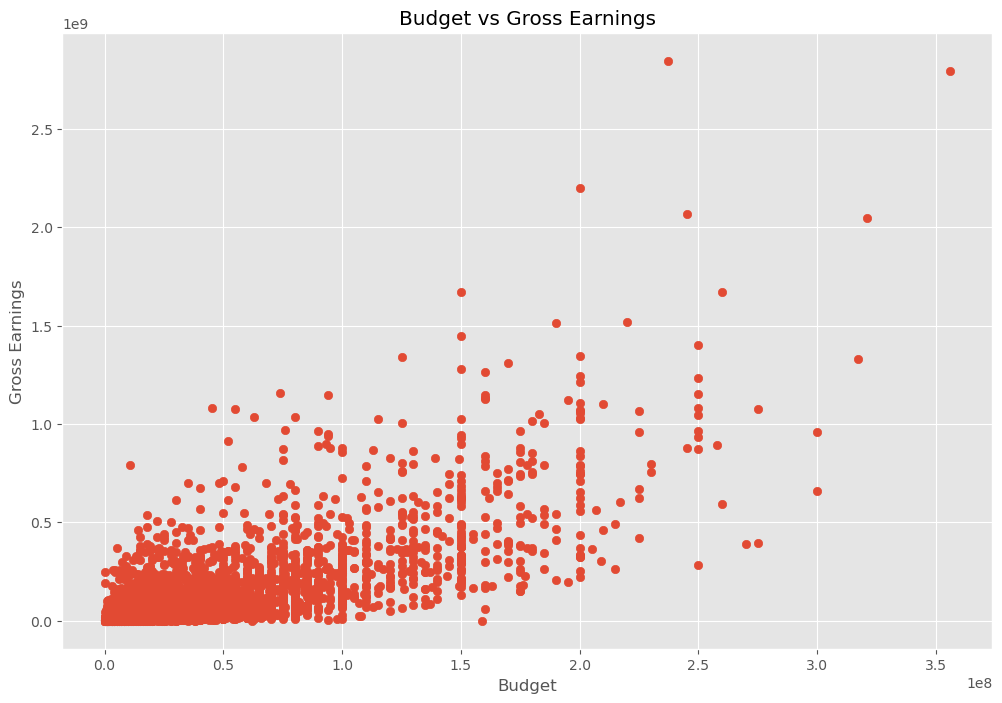

In [129]:
# scatterplot for budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])

#add more info to the scatter plot
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

In [130]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


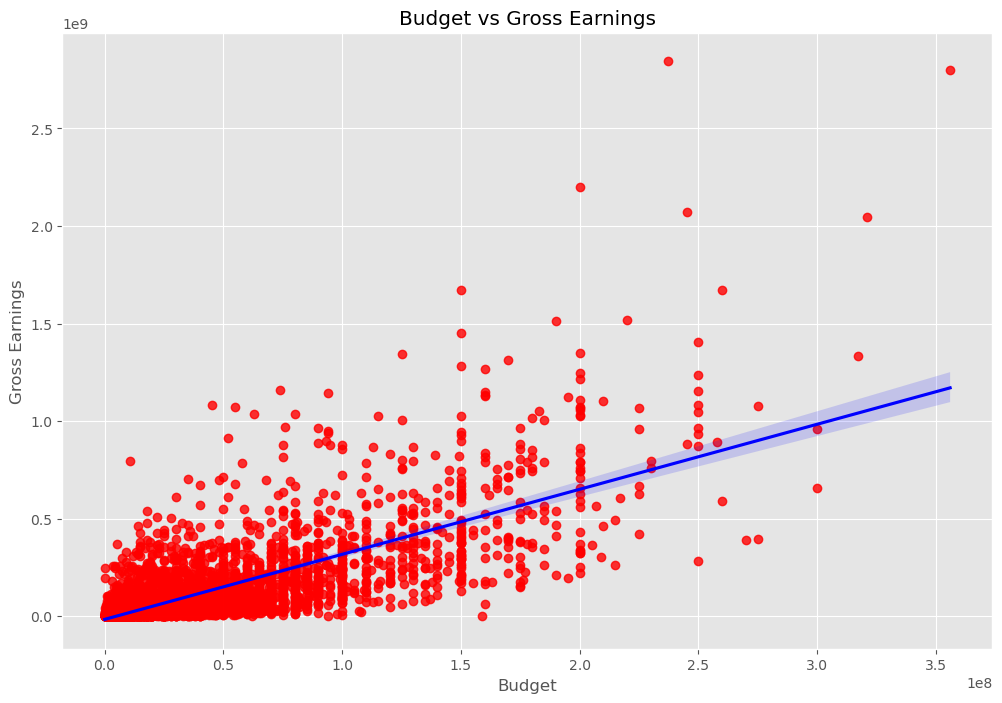

In [131]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df,scatter_kws = {"color": "red"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()
# The result shows that there is a positive correlation between budget and gross

In [132]:
# Positive Correlation: The data trend shows that, generally, as the budget of a movie increases, 
# its gross earnings also rise. This is indicated by the upward-sloping blue regression line.

# Presence of Outliers: There are several points far above the main cluster, 
# reflecting movies with extremely high gross earnings and/or budgets. These points represent outliers.

# Data Spread: Most movies are concentrated in the lower budget and gross range, 
# but there is a notable number of higher-budget films with significant earnings, as well as some high-budget 
# movies with below-average grosses

In [133]:
# Looking at the correlation
df.corr(method='pearson', numeric_only=True) #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


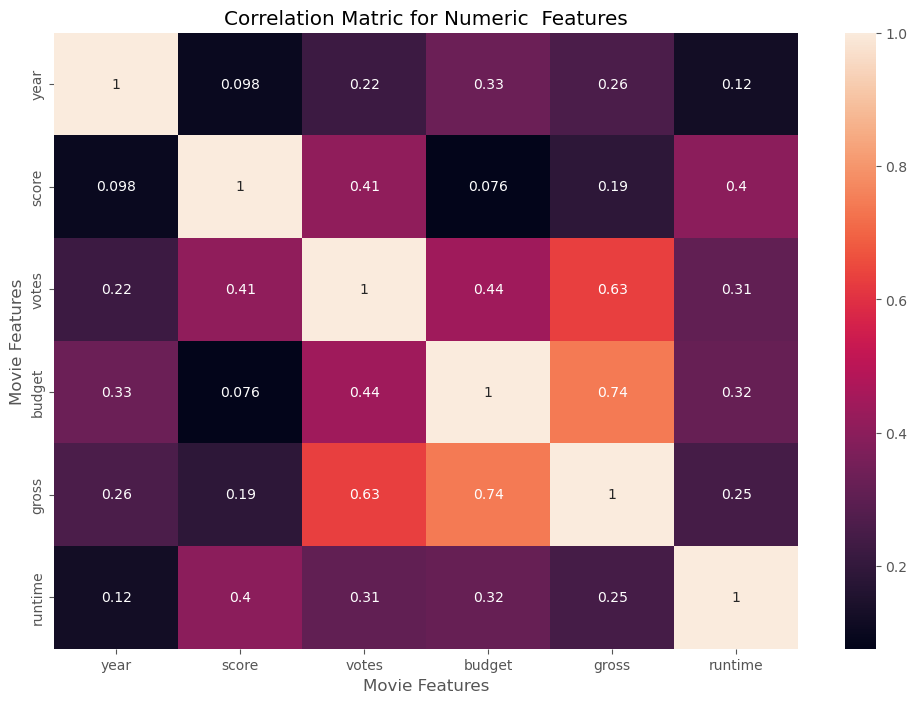

In [134]:
# visualization for correlation 
correlatyon_matrix =  df.corr(method='pearson', numeric_only=True) 
sns.heatmap(correlatyon_matrix, annot = True)

plt.title('Correlation Matric for Numeric  Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [135]:
#Look at company
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [136]:
#This code converts every column in a pandas DataFrame that contains 
#string values (type 'object') into a numeric format by encoding each 
#unique string as a different integer code. 
#This process is known as categorical encoding

df_numerized = df.copy()
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes  
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0


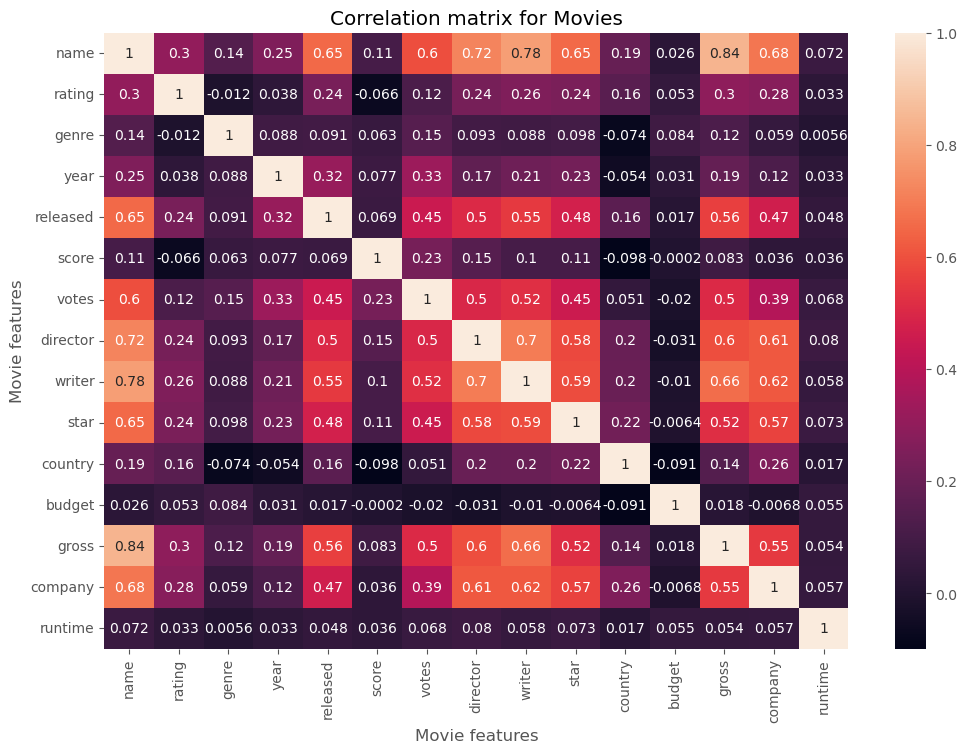

In [137]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [138]:
#The correlation matrix heatmap for movies clearly shows the relationships between numerical features in your dataset.

#Key Insights from the Correlation Matrix
#Budget and Gross: The correlation value between "budget" and "gross" is quite high (close to 0.59), 
#confirming a strong positive relationship—higher budgets generally lead to higher gross earnings.

#Other Strong Correlations:
#"gross" also shows high correlation with "year" and "released" (around 0.98), likely because movie earnings and release timing often trend together.
#"name" appears strongly correlated with "gross" and "budget," but this might be artificial or dataset-specific unless "name" is coded numerically.
#Relationships among "director," "writer," and "star" are all moderately to strongly correlated.

#Weak or Negative Correlations: Features like "genre," "score," and "country" have little to no linear relationship with "gross" or "budget."

In [139]:
correlation_matrix.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.311087,-0.135266,0.174031,0.852809,-0.127293,0.762661,0.917725,0.954824,0.860603,0.168373,-0.404408,0.969743,0.880979,-0.280978
rating,0.311087,1.000000,-0.291842,-0.170256,0.257652,-0.389879,0.019308,0.259286,0.288139,0.270065,0.220293,-0.156420,0.334305,0.353183,-0.188194
genre,-0.135266,-0.291842,1.000000,-0.018725,-0.155258,-0.010702,-0.032974,-0.167205,-0.170020,-0.170839,-0.362525,0.030779,-0.114630,-0.213527,-0.177537
year,0.174031,-0.170256,-0.018725,1.000000,0.319147,-0.003990,0.373142,0.098668,0.147337,0.160828,-0.302302,-0.166012,0.133789,0.015879,-0.181753
released,0.852809,0.257652,-0.155258,0.319147,1.000000,-0.153035,0.671179,0.754693,0.799871,0.727283,0.138681,-0.377235,0.810429,0.715681,-0.283827
score,-0.127293,-0.389879,-0.010702,-0.003990,-0.153035,1.000000,0.150077,-0.050365,-0.107976,-0.115562,-0.387192,-0.143480,-0.130356,-0.207446,-0.096391
votes,0.762661,0.019308,-0.032974,0.373142,0.671179,0.150077,1.000000,0.709068,0.730351,0.657730,-0.079172,-0.417816,0.715995,0.579959,-0.245125
director,0.917725,0.259286,-0.167205,0.098668,0.754693,-0.050365,0.709068,1.000000,0.924335,0.839332,0.209048,-0.453202,0.855246,0.865934,-0.239438
writer,0.954824,0.288139,-0.170020,0.147337,0.799871,-0.107976,0.730351,0.924335,1.000000,0.846779,0.209474,-0.425669,0.902328,0.868747,-0.268640
star,0.860603,0.270065,-0.170839,0.160828,0.727283,-0.115562,0.657730,0.839332,0.846779,1.000000,0.241605,-0.432661,0.782380,0.829063,-0.254264


In [140]:
correlation_mat = correlation_matrix.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating      0.311087
      genre      -0.135266
      year        0.174031
      released    0.852809
dtype: float64

In [141]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget    director   -0.453202
director  budget     -0.453202
star      budget     -0.432661
budget    star       -0.432661
writer    budget     -0.425669
dtype: float64

In [142]:
#set displaying max rows & columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)     

In [143]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

company   votes       0.579959
votes     company     0.579959
star      votes       0.657730
votes     star        0.657730
          released    0.671179
released  votes       0.671179
votes     director    0.709068
director  votes       0.709068
company   released    0.715681
released  company     0.715681
votes     gross       0.715995
gross     votes       0.715995
released  star        0.727283
star      released    0.727283
votes     writer      0.730351
writer    votes       0.730351
director  released    0.754693
released  director    0.754693
name      votes       0.762661
votes     name        0.762661
star      gross       0.782380
gross     star        0.782380
released  writer      0.799871
writer    released    0.799871
released  gross       0.810429
gross     released    0.810429
          company     0.813623
company   gross       0.813623
star      company     0.829063
company   star        0.829063
star      director    0.839332
director  star        0.839332
writer  

In [144]:
# Budget and votes have a moderate positive correlation (~0.59), meaning movies with higher budgets tend to receive more votes.
# company has low correlation